<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning__%ED%99%9C%EC%84%B1%ED%99%94_%ED%95%A8%EC%88%98_%EB%8B%A4%EB%A5%B4%EA%B2%8C_%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

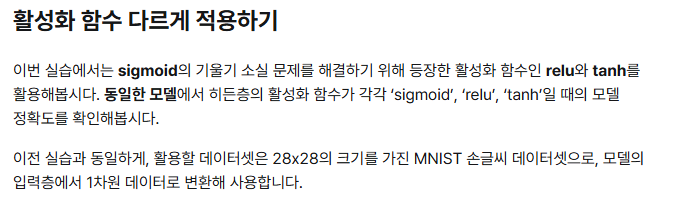

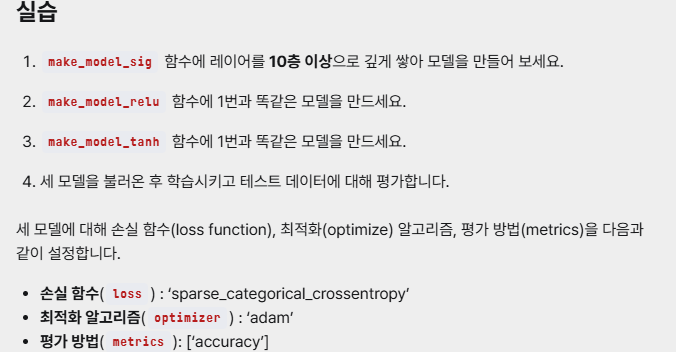

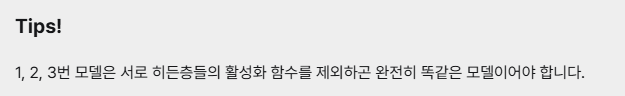

In [ ]:
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

'''
1. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 'sigmoid'로 설정하세요.
'''

def make_model_sig():

    model_sig = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(64, activation='sigmoid'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model_sig

'''
2. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 'relu'로 설정하세요.
'''

def make_model_relu():

    model_relu = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model_relu


'''
3. 활성화 함수는 출력층만 그대로 두고
   나머지 히든층들은 'tanh'로 설정하세요.
'''

def make_model_tanh():

    model_tanh = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return model_tanh

'''
4. 세 개의 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. make_model_sig, make_model_relu, make_model_tanh 함수를 이용해 세 모델을 불러옵니다.

   Step02. 세 모델의 손실 함수, 최적화 알고리즘,
          평가 방법을 설정합니다.

   Step03. 세 모델의 구조를 확인하는 코드를 작성합니다.
           우리가 만든 모델이 얼마나 깊은지 확인해보세요.

   Step04. 세 모델을 학습시킵니다.
           'epochs'는 5로 설정합니다.
           검증용 데이터는 설정하지 않습니다.

   Step05. 세 모델을 테스트하고 accuracy 값을 출력합니다.
           셋 중 어느 모델의 성능이 가장 좋은지 확인해보세요.
'''

def main():

    # MNIST 데이터를 불러오고 전처리합니다.
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    model_sig = make_model_sig()   # 히든층들의 활성화 함수로 sigmoid를 쓰는 모델입니다.
    model_relu = make_model_relu()  # 히든층들의 활성화 함수로 relu를 쓰는 모델입니다.
    model_tanh = make_model_tanh()  # 히든층들의 활성화 함수로 tanh를 쓰는 모델입니다.

    model_sig.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_relu.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_tanh.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_sig.summary()
    model_relu.summary()
    model_tanh.summary()

    model_sig_history = model_sig.fit(x_train, y_train, epochs=5, batch_size=500, verbose=0)
    print('\n')
    model_relu_history = model_relu.fit(x_train, y_train, epochs=5, batch_size=500, verbose=0)
    print('\n')
    model_tanh_history = model_tanh.fit(x_train, y_train, epochs=5, batch_size=500, verbose=0)

    scores_sig = model_sig.evaluate(x_test, y_test, verbose=0)
    scores_relu = model_relu.evaluate(x_test, y_test, verbose=0)
    scores_tanh = model_tanh.evaluate(x_test, y_test, verbose=0)

    print('\naccuracy_sig: ', scores_sig[-1])
    print('accuracy_relu: ', scores_relu[-1])
    print('accuracy_tanh: ', scores_tanh[-1])

    return model_sig_history, model_relu_history, model_tanh_history

if __name__ == "__main__":
    main()

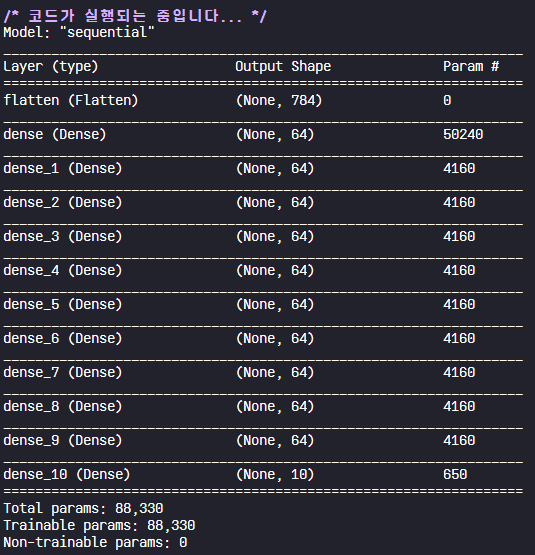

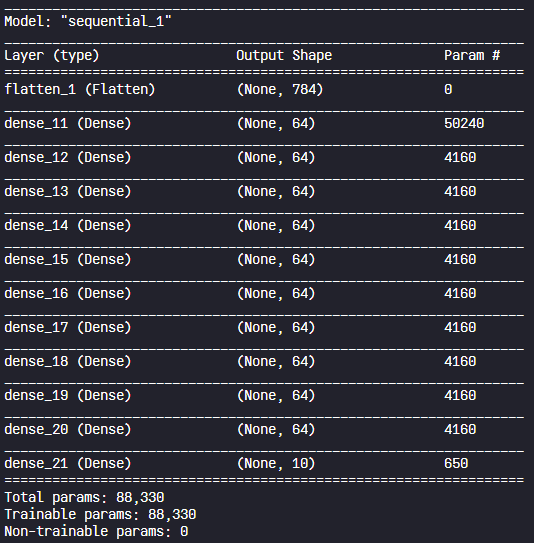

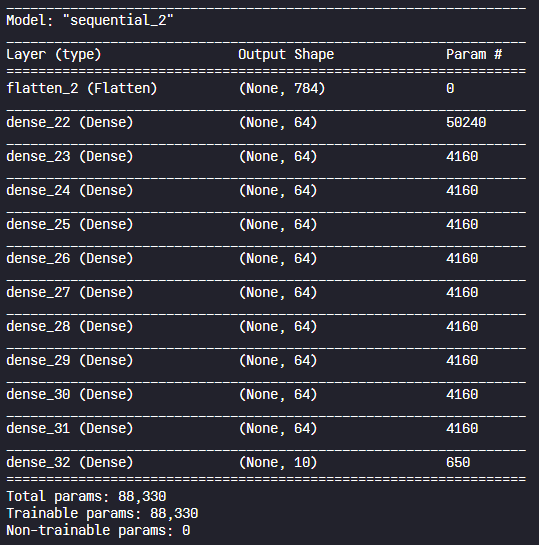

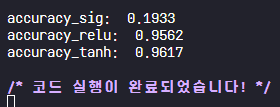

sigmoid 는 기울기 소실 문제로 정확도가 낮고, relu 와 tanh 는 기울기 소실 문제가 발생하지 않아서 정확도가 높다.